In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy.linalg as LA

Vi får givet en Hamilton $\hat{H} = \frac{\Omega}{2}\sigma_x + \frac{\Delta}{2}\sigma_z$ og bliver bedt om at løse schroedinger ligningen for $\Omega = 4, \Delta = 1$

In [14]:
#Define omega and delta

Omega = 4
Delta = 1

In [15]:
#Define initial state to be in the groundstate first entry in state vector is excited state population, 2nd entry is ground state population

initialState = np.array([0,1],dtype=np.complex128)


#Initialize and fill out Hamiltonian as eq. (1)
Hamiltonian = np.zeros((2,2),dtype = np.complex128)

Hamiltonian[0,1] = Omega/2
Hamiltonian[1,0] = Omega/2
Hamiltonian[0,0] = Delta/2
Hamiltonian[1,1] = -Delta/2

We might have to do this a few times, so let's make it into a function!

In [16]:
#Do a for loop to run the simulation. Time scale is of magnitude 1 so let dt be 1/1000

dt = 1e-3

t0 = 0
def SolveSchr(dt,t0,tend,initialState,Hamiltonian):
    state = initialState
    t = t0
    popExc = []
    popGS = []
    ts = []
    while t<tend:
        #Save current populations
        popExc.append(np.abs(state[0])**2)
        popGS.append(np.abs(state[1])**2)
        ts.append(t)
        
        #Change in state may be calculated via schroedinger eq.
        dState = -1j*Hamiltonian@state*dt
        
        #Update state and time
        state+=dState
        t+= dt
    popExc = np.array(popExc)
    popGS = np.array(popGS)
    ts = np.array(ts)
    return ts,popGS,popExc
ts,popGS,popExc = SolveSchr(dt,t0,2,initialState,Hamiltonian)

Text(0.5, 0, 'Time')

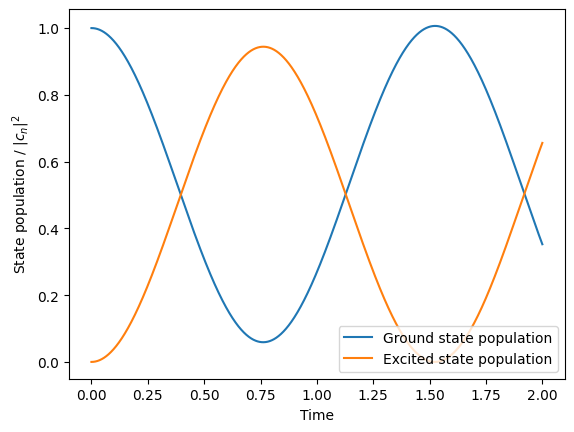

In [17]:
fig,ax = plt.subplots()
ax.plot(ts,popGS,label = 'Ground state population')
ax.plot(ts,popExc,label = 'Excited state population')
ax.legend(loc = 'lower right')
ax.set_ylabel(r'State population / $\vert c_n\vert^2$')
ax.set_xlabel(r'Time')

Let's change $\Delta = 0$

In [18]:
Delta = 0
initialState = np.array([0,1],dtype=np.complex128)



Hamiltonian = np.zeros((2,2),dtype = np.complex128)

Hamiltonian[0,1] = Omega/2
Hamiltonian[1,0] = Omega/2
Hamiltonian[0,0] = Delta/2
Hamiltonian[1,1] = -Delta/2

ts,popGS,popExc = SolveSchr(dt,t0,2,initialState,Hamiltonian)

Text(0.5, 0, 'Time')

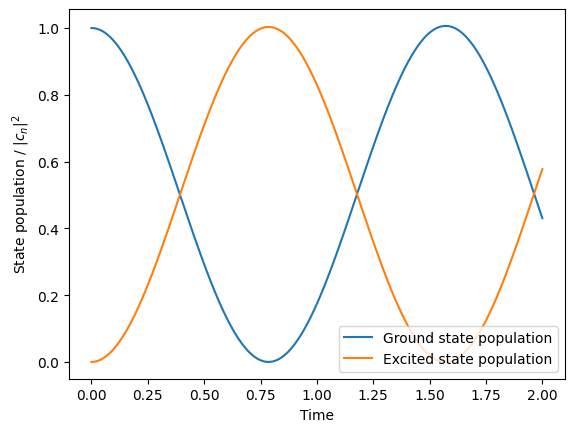

In [19]:
fig,ax = plt.subplots()
ax.plot(ts,popGS,label = 'Ground state population')
ax.plot(ts,popExc,label = 'Excited state population')
ax.legend(loc = 'lower right')
ax.set_ylabel(r'State population / $\vert c_n\vert^2$')
ax.set_xlabel(r'Time')

When the detuning is zero we make perfect "flops" between being purely in the excited state, and purely in the ground state!

We're now asked to implement the "Monte carlo" approach. We wil do this as a function as well.

In [20]:
Delta = 200
Omega = 2
initialState = np.array([1,0],dtype=np.complex128)

Hamiltonian = np.zeros((2,2),dtype = np.complex128)

Hamiltonian[0,1] = Omega/2
Hamiltonian[1,0] = Omega/2
Hamiltonian[0,0] = Delta/2
Hamiltonian[1,1] = -Delta/2



def MonteCarloSolver(t0,tEnd,gamma,Hamiltonian,initState):
    t = t0
    state = initState
    popExc = []
    popGS = []
    ts = []
    X = np.zeros((2,2),dtype = np.complex128)
    X[1,1] = 1
    measureMatrix = -1j*gamma/2*X
    HamEff = Hamiltonian + measureMatrix

    while t < tEnd:
        epsilon = random.uniform(0,1)
        photonProb = gamma*dt*np.abs(state[1])**2
        if epsilon < photonProb:
            state = np.array([0,1],dtype=np.complex128)
        else:
            state += -1j*dt*HamEff@state
            state/= LA.norm(state)
        popExc.append(np.abs(state[0])**2)
        popGS.append(np.abs(state[1])**2)
        ts.append(t)
        t+=dt
    return ts,np.array(popGS),np.array(popExc)
        
ts,popGS,popExc = MonteCarloSolver(0,10,8,Hamiltonian,initialState)

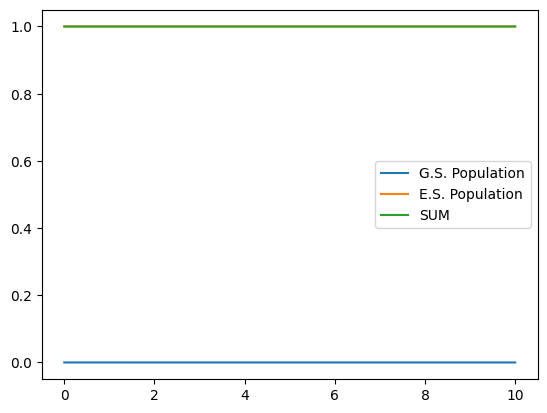

In [21]:
plt.plot(ts,popGS,label = 'G.S. Population')
plt.plot(ts,popExc, label = 'E.S. Population')
plt.plot(ts,popExc+popGS,label = 'SUM')
plt.legend()

Let us now try to solve the master equation as derived in the project handout!

In [22]:
dt = 1e-4
def MasterEqSolve(t0,tend,initialStateMatrix,H,gamma,X):
    t = t0
    stateMatrix = initialStateMatrix
    ts = []
    popGS = []
    popExc = []
    
    while t < tend:
        ts.append(t)
        popGS.append((stateMatrix[1,1]))
        popExc.append((stateMatrix[0,0]))
        stateMatrix += dt*(-1j*(H@stateMatrix-stateMatrix@H)+gamma/2*(2*X@stateMatrix@X-X@stateMatrix-stateMatrix@X))
        t+=dt
    return np.array(ts),np.array(popGS),np.array(popExc)


Delta = 0
X = np.zeros((2,2),dtype = np.complex128)
X[1,1] = 1
Hamiltonian = np.zeros((2,2),dtype = np.complex128)

Hamiltonian[0,1] = Omega/2
Hamiltonian[1,0] = Omega/2
print(Hamiltonian)

initStateMat = np.zeros((2,2),dtype=np.complex128)
initStateMat[1,1] = 1

ts,popGS,popExc = MasterEqSolve(t0,1,initStateMat,Hamiltonian,1,X)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


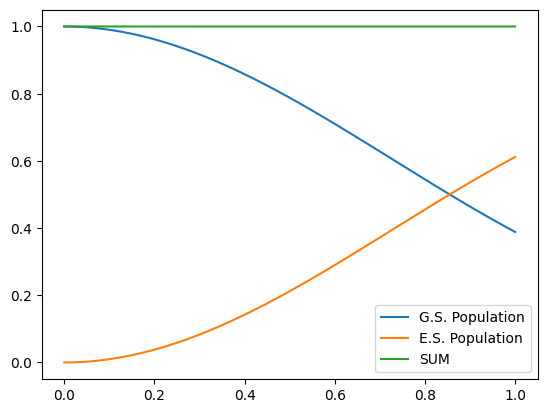

In [23]:
plt.plot(ts,popGS,label = 'G.S. Population')
plt.plot(ts,popExc, label = 'E.S. Population')
plt.plot(ts,popExc+popGS,label = 'SUM')
plt.legend()

In [24]:
N_traj = 500

Hamiltonian = np.zeros((2,2),dtype = np.complex128)

Hamiltonian[0,1] = Omega/2
Hamiltonian[1,0] = Omega/2


for j in range(N_traj):
    initialState = np.array([0,1],dtype = np.complex128)
    tsTemp,popGSTemp,popExcTemp = MonteCarloSolver(0,1,1,Hamiltonian,initialState)
    if j == 0:
        tsTraj = np.zeros(len(tsTemp))
        popGSTraj = np.zeros(len(tsTemp))
        popExcTraj = np.zeros(len(tsTemp))
    tsTraj+=tsTemp
    popGSTraj+=popGSTemp
    popExcTraj+=popExcTemp

tsTraj/=N_traj
popGSTraj/=N_traj
popExcTraj/=N_traj





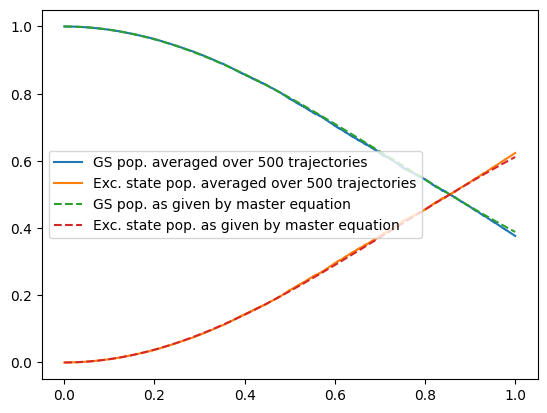

In [25]:
fig,ax = plt.subplots()
ax.plot(tsTraj,popGSTraj,label =rf'GS pop. averaged over {N_traj} trajectories')
ax.plot(tsTraj,popExcTraj, label = rf'Exc. state pop. averaged over {N_traj} trajectories')
ax.plot(ts,popGS,ls = '--', label = 'GS pop. as given by master equation')
ax.plot(tsTraj,popExc,ls = '--',label = 'Exc. state pop. as given by master equation')
ax.legend()

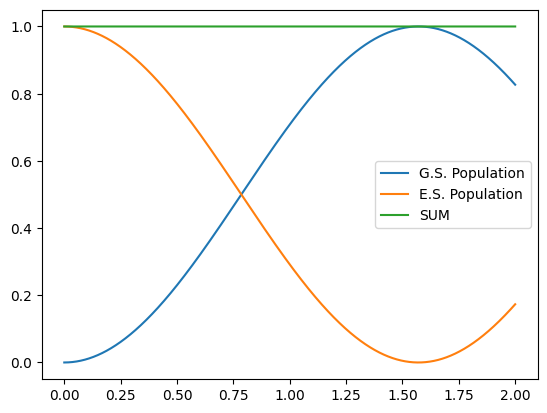

In [26]:
initialState = np.array([1,0],dtype = np.complex128)

ts,popGS,popExc = MonteCarloSolver(0,2,0,Hamiltonian,initialState)

plt.plot(ts,popGS,label = 'G.S. Population')
plt.plot(ts,popExc, label = 'E.S. Population')
plt.plot(ts,popExc+popGS,label = 'SUM')
plt.legend()